In [28]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

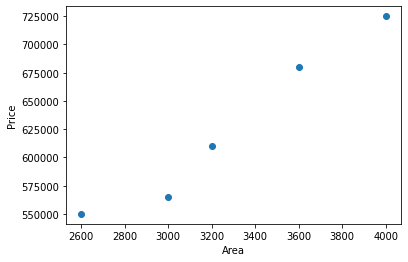

In [5]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price)

### Using Seaborn 

C:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

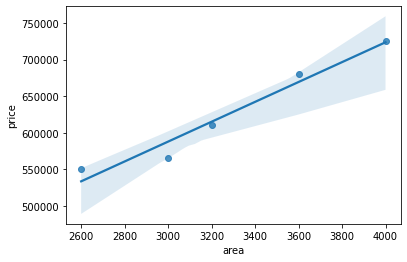

In [29]:
sns.regplot(df.area,df.price)

<AxesSubplot:xlabel='area', ylabel='price'>

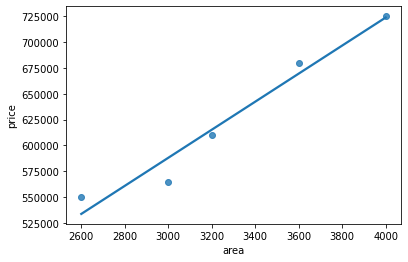

In [31]:
sns.regplot(df.area,df.price,ci = None)
#Note that ci=None tells Seaborn to hide the confidence interval bands on the plot. 

In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [15]:
reg.predict([[3300]])

C:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [16]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

### Check the Value

In [18]:
# y = mx+b
m = reg.coef_
b = reg.intercept_
area = 3300
price = m*area + b
price

array([628715.75342466])

## Now to predict from list of areas

In [19]:
data = pd.read_csv('areas.csv')
data

area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100

In [21]:
prices = reg.predict(data)
prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

### Saving the prices in same file

In [25]:
data['Prices'] = prices

In [26]:
data

area        Prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [27]:
data.to_csv('prediction.csv')

### Matplotlib to draw linear line


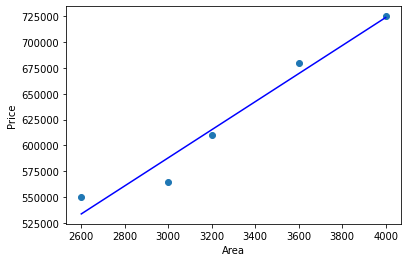

In [33]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]),color = 'blue')